# House Price Prediction Assignment Roadmap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
house = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/kc_house_data.csv")
house.shape

(21613, 23)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/train_advanced_regression.csv")
df.shape

(1460, 81)

In [4]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Alley,GarageType
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,NaN,Attchd
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,NaN,Attchd
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,NaN,Attchd
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,NaN,Detchd
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,NaN,Attchd


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house.isna().sum().sort_values(ascending=False)

Alley            19283
GarageType        2320
condition            0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
id                   0
dtype: int64

In [7]:
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

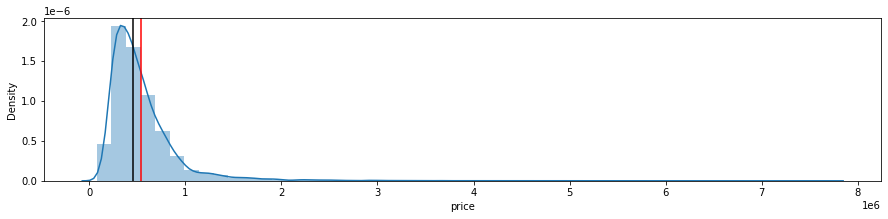

In [9]:
plt.figure(figsize=(15,3))
sns.distplot(house.price)
plt.axvline(house.price.mean(), color='red')
plt.axvline(house.price.median(), color='black')
plt.show()

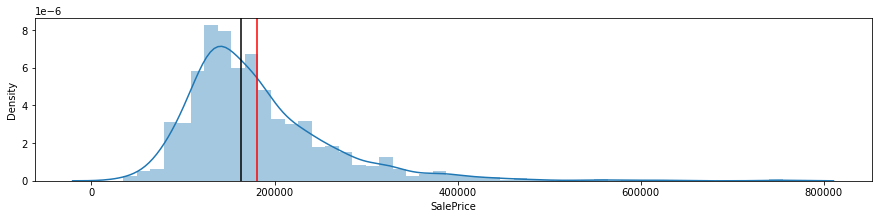

In [10]:
plt.figure(figsize=(15,3))
sns.distplot(df.SalePrice)
plt.axvline(df.SalePrice.mean(), color='red')
plt.axvline(df.SalePrice.median(), color='black')
plt.show()

In [11]:
from scipy.stats import norm
from scipy import stats
print(house.price.skew())
print(house.price.kurt())

4.021715573048684
34.522444410072566


In [12]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Alley', 'GarageType'],
      dtype='object')

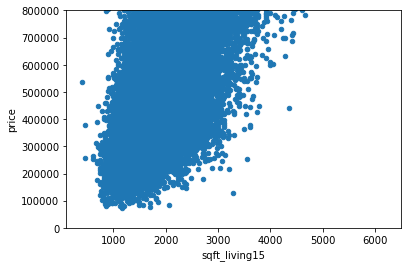

In [13]:
var = "sqft_living15"
data = pd.concat([house.price, house[var]], axis=1)
data.plot.scatter(x= var, y= 'price', ylim=(0,800000))
plt.show()

# var = "GrLivArea"
# data = pd.concat([df.SalePrice, df[var]], axis=1)
# data.plot.scatter(x= var, y= 'SalePrice', ylim=(0,800000))
# plt.show()

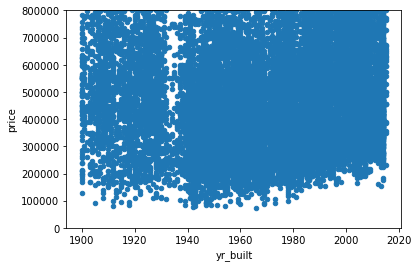

In [14]:
var = "yr_built"
data = pd.concat([house.price, house[var]], axis=1)
data.plot.scatter(x= var, y= 'price', ylim=(0,800000))
plt.show()

# var = "TotalBsmtSF"
# data = pd.concat([df.SalePrice, df[var]], axis=1)
# data.plot.scatter(x= var, y= 'SalePrice', ylim=(0,800000))
# plt.show()

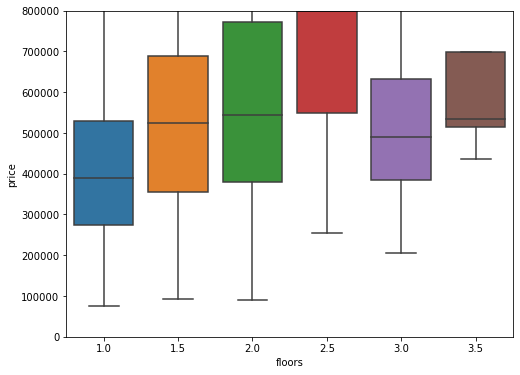

In [15]:
var = "floors"
data = pd.concat([house.price, house[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= var, y= 'price', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

# var = "OverallQual"
# data = pd.concat([df.price, df[var]], axis=1)
# f, ax = plt.subplots(figsize=(8,6))
# fig = sns.boxplot(x= var, y= 'Saleprice', data=data)
# fig.axis(ymin=0, ymax=800000)
# plt.show()

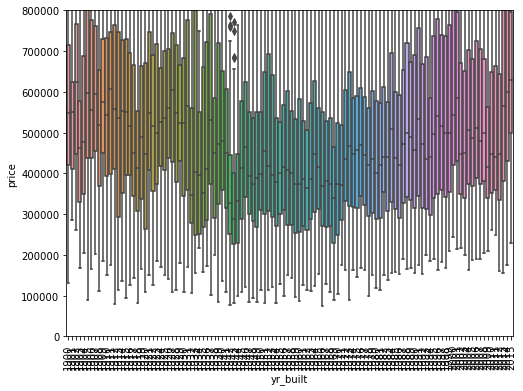

In [16]:
var = "yr_built"
data = pd.concat([house.price, house[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= var, y= 'price', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

# var = "YearBuilt"
# data = pd.concat([df.price, df[var]], axis=1)
# f, ax = plt.subplots(figsize=(8,6))
# fig = sns.boxplot(x= var, y= 'Saleprice', data=data)
# fig.axis(ymin=0, ymax=800000)
# plt.xticks(rotation=90)
# plt.show()

In [17]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

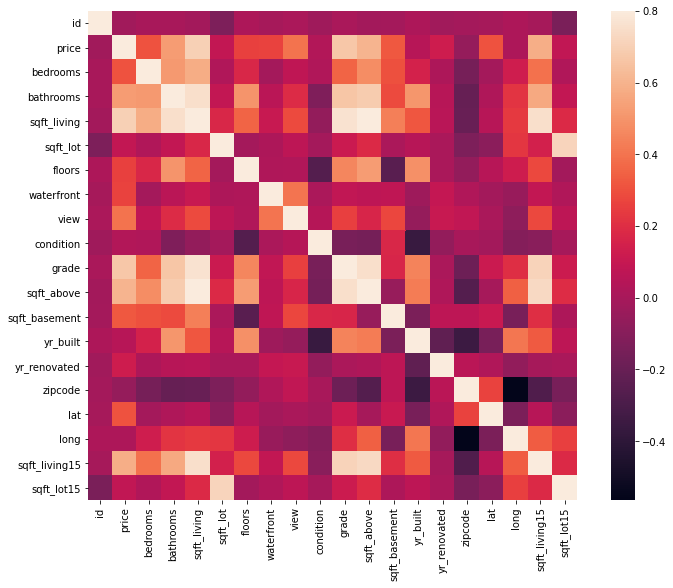

In [18]:
# Correlation Matrix

corrmat = house.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

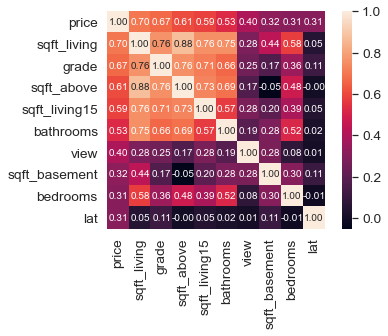

In [19]:
# saleprice correlation matrix - Create yours similarly - use to identify Multicollinearity
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [20]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Alley', 'GarageType'],
      dtype='object')

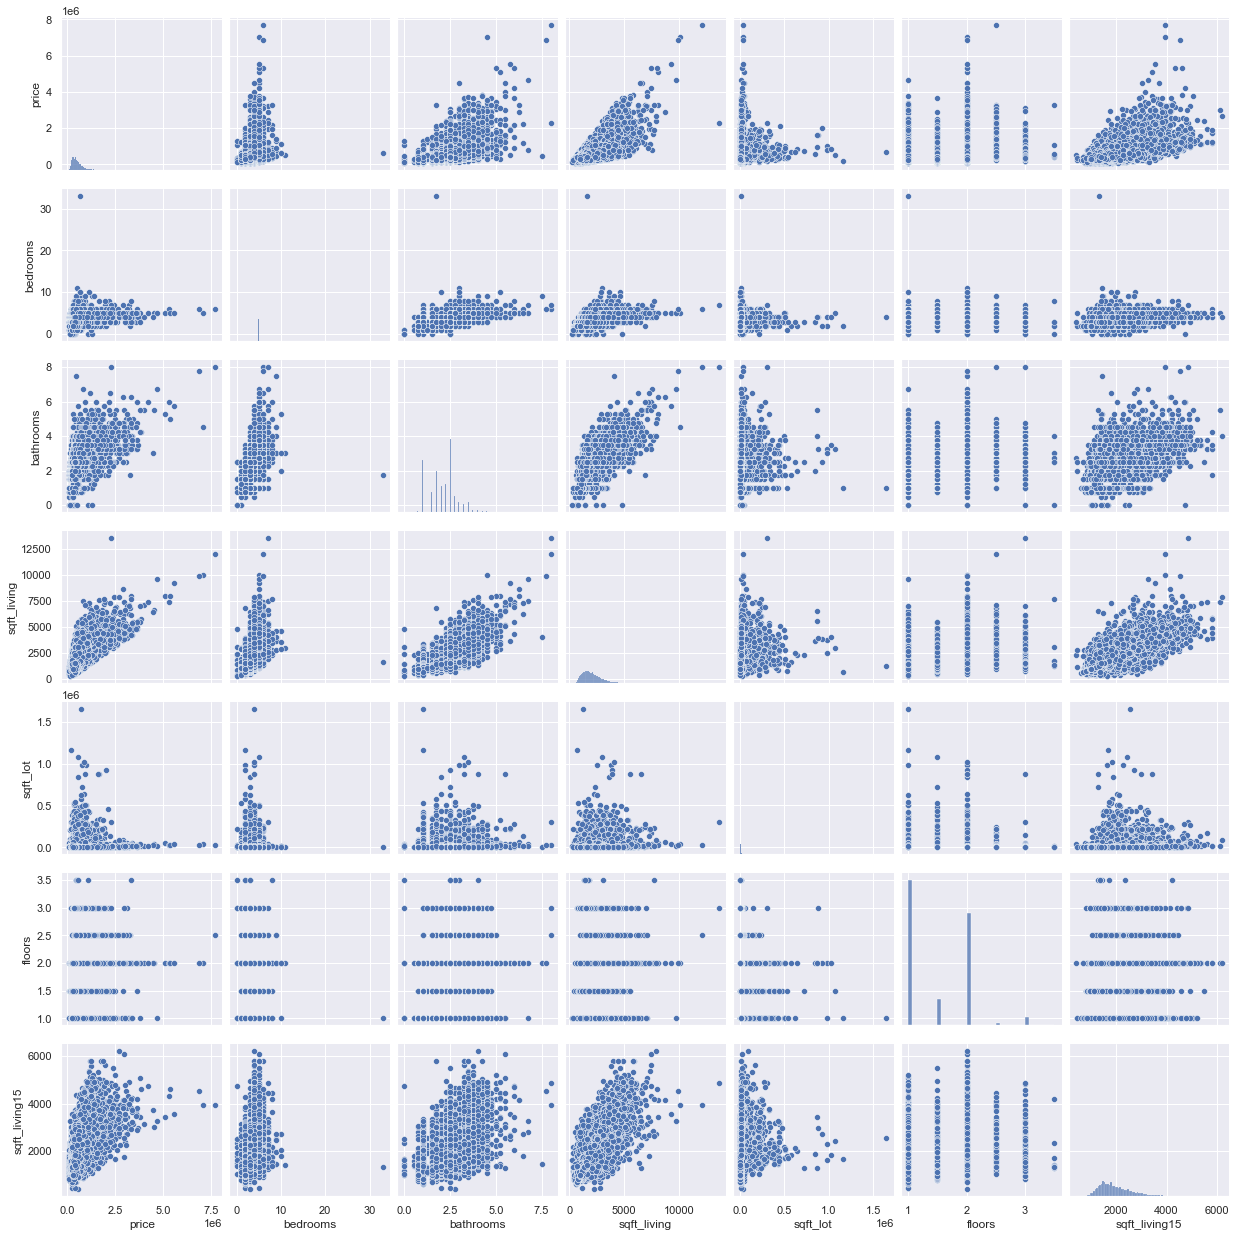

In [21]:
# scatterplot

sns.set()
cols = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_living15']
sns.pairplot(house[cols], size=2.5)
plt.show()

# For ur data
# cols to be considered will be SalePrice, OverallQual, GrLivArea, 
# GarageCars, TotalBsmySF, FullBath, YearBuilt

In [22]:
# Missing data

total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
Alley,19283,0.892195
GarageType,2320,0.107343
condition,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000
floors,0,0.000000


In [23]:
null_has_meaning = ["Alley","GarageType"]
# You figure out from df

In [24]:
for i in null_has_meaning:
    house[i].fillna("None", inplace=True)

In [25]:
# Missing data

total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
GarageType,0,0.0
condition,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0


In [26]:
print(house.shape)
house.dropna(inplace=True)
print(house.shape)

(21613, 23)
(21613, 23)


### Lets try to figure out the dataype of all remaining features

In [27]:
types_train = house.dtypes
num_train = types_train[(types_train == "int64") | (types_train == "float")]
cat_train = types_train[types_train == "object"]

In [28]:
pd.DataFrame(types_train).reset_index()[0].value_counts()

int64      15
float64     5
object      3
Name: 0, dtype: int64

In [29]:
numerical_values_train = list(num_train.index)
numerical_values_train

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [30]:
categorical_values_train = list(cat_train.index)
categorical_values_train

['date', 'Alley', 'GarageType']

## Data preparation

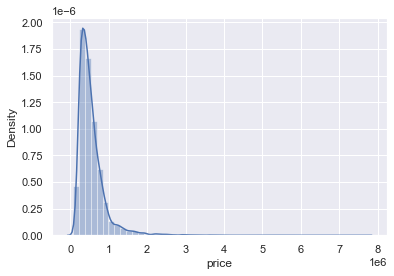

In [31]:
sns.distplot(house.price)
plt.show()

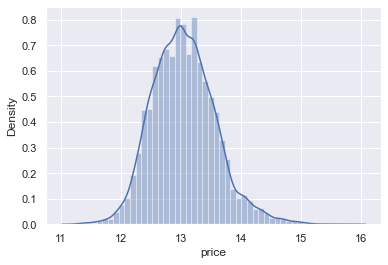

In [32]:
sns.distplot(np.log(house.price))
plt.show()

In [33]:
house["TransformedPrice"] = np.log(house.price)

In [34]:
categorical_values_train

['date', 'Alley', 'GarageType']

In [35]:
# One Hot encoding - Dummification

# pd.get_dummies(house, columns=categorical_values_train, drop_first=True)

# Label Encoding
for i in categorical_values_train:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j,i] = feature_list.index(j)

In [36]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Alley,GarageType,TransformedPrice
0,7129300520,31,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,1,1,12.309982
1,6414100192,87,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,13.195614
2,5631500400,99,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,1,1,12.100712
3,2487200875,87,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,1,5,13.311329
4,1954400510,364,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,1,1,13.142166


In [37]:
house.Alley.value_counts()

1    19283
2     2280
0       50
Name: Alley, dtype: int64

In [38]:
house.GarageType.value_counts()

1    16544
4     2320
6     2259
5      387
0       88
3        9
2        6
Name: GarageType, dtype: int64

In [39]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Alley,GarageType,TransformedPrice
0,7129300520,31,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,1,1,12.309982
1,6414100192,87,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,13.195614
2,5631500400,99,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,1,1,12.100712
3,2487200875,87,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,1,5,13.311329
4,1954400510,364,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,1,1,13.142166


# Modeling

In [40]:
X = house.drop(['id','price','TransformedPrice'], axis=1)
y = house.TransformedPrice

In [41]:
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Alley,GarageType
0,31,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,1,1
1,87,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,99,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,1,1
3,87,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1,5
4,364,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,174,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,1,1
21609,304,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,1,1
21610,15,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,1,1
21611,197,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,1


In [42]:
y

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21608    12.793859
21609    12.899220
21610    12.904459
21611    12.899220
21612    12.691580
Name: TransformedPrice, Length: 21613, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [44]:
# List of alphas to tune

params = { 'alpha' : [
    0.0001, 0.001, 0.01, 0.05,
    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
    10.0, 20, 50, 100, 500, 1000
]}
params

{'alpha': [0.0001,
  0.001,
  0.01,
  0.05,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  20,
  50,
  100,
  500,
  1000]}

In [45]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV

In [46]:
# Applying Lasso

lasso = Lasso()

# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=True)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.463982,0.035116,0.004791,0.000704,0.0001,{'alpha': 0.0001},-0.196036,-0.193771,-0.192397,-0.195696,...,-0.195743,0.002859,1,-0.195072,-0.195913,-0.196322,-0.195562,-0.194060,-0.195386,0.000780
1,1.453936,0.034808,0.004252,0.000421,0.001,{'alpha': 0.001},-0.196440,-0.193372,-0.192588,-0.195758,...,-0.195764,0.002838,2,-0.195150,-0.195965,-0.196410,-0.195517,-0.194184,-0.195445,0.000759
2,1.271726,0.026628,0.004214,0.000464,0.01,{'alpha': 0.01},-0.209066,-0.208664,-0.208218,-0.210840,...,-0.210184,0.002166,3,-0.209829,-0.210133,-0.210789,-0.209782,-0.209026,-0.209912,0.000570
3,1.013305,0.019469,0.004222,0.000469,0.05,{'alpha': 0.05},-0.263435,-0.264128,-0.264113,-0.266157,...,-0.264998,0.001413,4,-0.264919,-0.265190,-0.265044,-0.264178,-0.264342,-0.264735,0.000400
4,0.178126,0.016141,0.004674,0.000315,0.1,{'alpha': 0.1},-0.284025,-0.287591,-0.285685,-0.285296,...,-0.286269,0.001686,5,-0.285953,-0.286540,-0.286190,-0.285294,-0.285641,-0.285924,0.000431


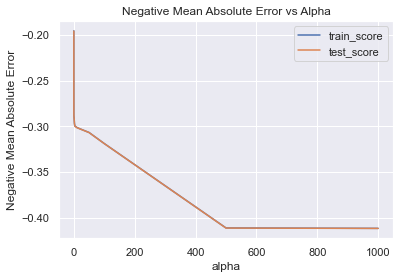

In [48]:
# Plotting mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend(['train_score', 'test_score'], loc='best')
plt.show()

In [64]:
pd.options.display.float_format = '{:.4f}'.format


In [65]:
alpha = 50

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=50)

In [67]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.06209097e-04,
        1.54057519e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  6.15397790e-05, -4.54796473e-07,  0.00000000e+00,
       -0.00000000e+00])

In [51]:
X_train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Alley', 'GarageType'],
      dtype='object')

In [52]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
r2_train_lasso = r2_score(y_train, y_pred_train)
r2_test_lasso = r2_score(y_test, y_pred_test)

print("r2_train_lasso:",r2_train_lasso)
print("r2_test_lasso:",r2_test_lasso)

r2_train_lasso: 0.48342534047629027
r2_test_lasso: 0.49250106241561964


In [54]:
betas = pd.DataFrame(index=X_train.columns)
betas

""
date
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade


In [70]:
betas['Lasso'] = lasso.coef_
pd.set_option('display.float_format', lambda x: '%.7f' % x)
betas

,Lasso
date,-0.0000000
bedrooms,0.0000000
bathrooms,0.0000000
sqft_living,0.0003062
sqft_lot,0.0000002
floors,0.0000000
waterfront,0.0000000
view,0.0000000
condition,0.0000000
grade,0.0000000


In [56]:
# Top 5 important predictors as per lasso
betas.sort_values(by="Lasso", ascending=False).index[:5].to_list()

['sqft_living', 'sqft_living15', 'sqft_lot', 'date', 'sqft_basement']

In [79]:
# Applying Ridge

ridge = Ridge()
# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=True)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0205012,0.0073891,0.0043263,0.0014246,0.0001000,{'alpha': 0.0001},-0.1960344,-0.1938653,-0.1924355,-0.1957465,...,-0.1957918,0.0028601,18,-0.1951198,-0.1959623,-0.1963647,-0.1956171,-0.1941089,-0.1954346,0.0007789
1,0.0158998,0.0001446,0.0035552,0.0000760,0.0010000,{'alpha': 0.001},-0.1960344,-0.1938653,-0.1924355,-0.1957465,...,-0.1957918,0.0028601,17,-0.1951198,-0.1959623,-0.1963647,-0.1956171,-0.1941089,-0.1954346,0.0007789
2,0.0157725,0.0000857,0.0035696,0.0000864,0.0100000,{'alpha': 0.01},-0.1960344,-0.1938652,-0.1924356,-0.1957463,...,-0.1957917,0.0028600,16,-0.1951197,-0.1959622,-0.1963646,-0.1956170,-0.1941089,-0.1954345,0.0007789
3,0.0158183,0.0001416,0.0035395,0.0000576,0.0500000,{'alpha': 0.05},-0.1960343,-0.1938651,-0.1924358,-0.1957457,...,-0.1957914,0.0028597,15,-0.1951194,-0.1959617,-0.1963643,-0.1956166,-0.1941086,-0.1954341,0.0007788
4,0.0159424,0.0003010,0.0035599,0.0000341,0.1000000,{'alpha': 0.1},-0.1960341,-0.1938649,-0.1924360,-0.1957449,...,-0.1957911,0.0028593,14,-0.1951191,-0.1959610,-0.1963640,-0.1956161,-0.1941082,-0.1954337,0.0007788


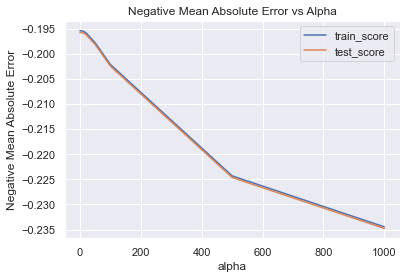

In [81]:
# Plotting mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype("int")

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend(['train_score', 'test_score'], loc='best')
plt.show()

In [82]:
alpha= 10

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [83]:
ridge.coef_

array([-2.76042407e-05, -1.09950799e-02,  7.75840849e-02,  8.94818336e-05,
        3.98134676e-07,  7.11212779e-02,  3.77157425e-01,  5.44044275e-02,
        6.26656771e-02,  1.61681643e-01,  3.63956083e-05,  5.30865727e-05,
       -3.56572421e-03,  2.81358861e-05, -5.28951998e-04,  1.35196743e+00,
       -1.23179404e-01,  1.04700329e-04, -1.47730872e-07, -8.76995497e-03,
       -9.76955441e-04])

In [84]:
betas['Ridge'] = ridge.coef_

In [85]:
betas

,Lasso,Ridge
date,-0.0000000,-0.0000276
bedrooms,0.0000000,-0.0109951
bathrooms,0.0000000,0.0775841
sqft_living,0.0003062,0.0000895
sqft_lot,0.0000002,0.0000004
floors,0.0000000,0.0711213
waterfront,0.0000000,0.3771574
view,0.0000000,0.0544044
condition,0.0000000,0.0626657
grade,0.0000000,0.1616816


In [86]:
# Top 5 important predictors as per Ridge
betas.sort_values(by="Ridge", ascending=False).index[:5].to_list()

['lat', 'waterfront', 'grade', 'bathrooms', 'floors']

# Happy Learning